In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

Data
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe (1/0) a term deposit (variable y).

This dataset provides the customer information. It includes 41188 records and 21 fields.







1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - (numeric)

17 - cons.price.idx: consumer price index - (numeric)

18 - cons.conf.idx: consumer confidence index - (numeric)

19 - euribor3m: euribor 3 month rate - (numeric)

20 - nr.employed: number of employees - (numeric)

Predict variable (desired target):
y - has the client subscribed a term deposit? (binary: '1','0')

The education column of the dataset has many categories and we need to reduce the categories for a better modelling. The education column has the following categories

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/Banking_Dataset.csv')
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [5]:
###
df.contact.value_counts()

#most of customers are approached by cellular

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [6]:
df.education.value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [7]:
#education column has many categories so we replace it with  single category
#we replace some categories with one category school

df = df.replace(['basic.9y','basic.4y','basic.6y'],['Basic','Basic','Basic',])

In [8]:
df.education.value_counts()

Basic                  12513
university.degree      12168
high.school             9515
professional.course     5243
unknown                 1731
illiterate                18
Name: education, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

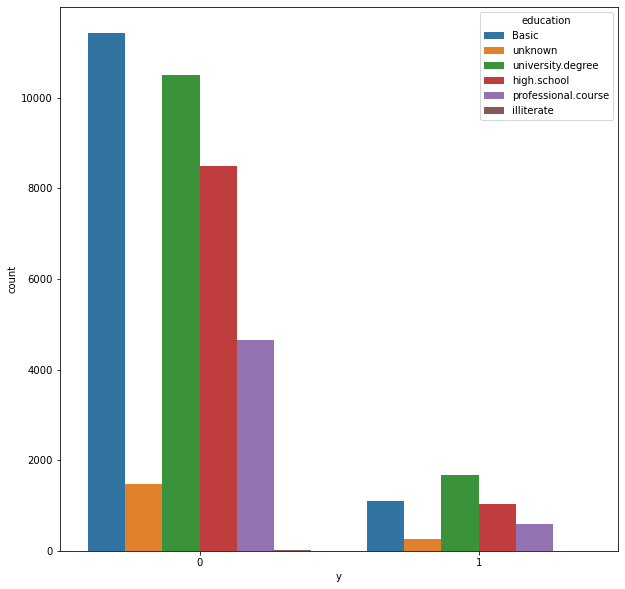

In [9]:
plt.figure(figsize = (10,10))

sns.countplot(x = 'y', hue = 'education', data = df)

# most of the customers who took subscription where having university degree

### Data Exploration

In [10]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [11]:
df.y.value_counts(normalize = True)

#88 percent are 0's and 11 percent are 1's

0    0.887346
1    0.112654
Name: y, dtype: float64

<AxesSubplot:xlabel='y', ylabel='count'>

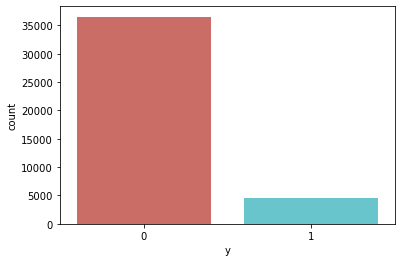

In [12]:
sns.countplot(x = 'y', data = df, palette = 'hls')  #palette decides the colours and styles

In [13]:
df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [14]:
df.groupby('marital').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.61340,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.57281,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.53380,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.18750,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


In [15]:
df.groupby('job').mean()

#students and retired are better customers

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [16]:
df.groupby('education').mean()
#illeterats are better customers than others

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
education,,,,,,,,,,,
Basic,42.163910,263.043874,2.559498,974.877967,0.141053,0.191329,93.639933,-40.927595,3.729654,5172.014113,0.087029
high.school,37.998213,260.886810,2.568576,964.358382,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,276.777778,2.277778,943.833333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,252.533855,2.586115,960.765974,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,253.223373,2.563527,951.807692,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,262.390526,2.596187,942.830734,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [17]:
pd.crosstab(df.job, df.y) #we created a table w.r.t job and y

y,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


Text(0, 0.5, 'Frequency of Purchase')

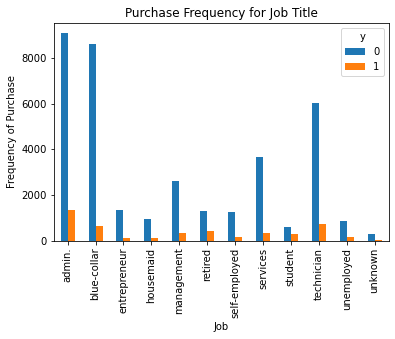

In [18]:
pd.crosstab(df.job, df.y).plot(kind = 'bar')

plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

frequenccy of purchase of deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable

In [19]:
table = pd.crosstab(df.marital, df.y)
table

y,0,1
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


<AxesSubplot:xlabel='marital'>

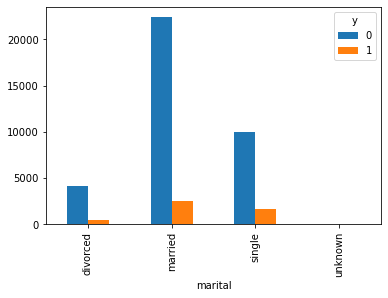

In [20]:
pd.crosstab(df.marital, df.y).plot(kind='bar')

In [21]:
table.sum(1)   #addition according to rows

marital
divorced     4612
married     24928
single      11568
unknown        80
dtype: int64

In [22]:
table.sum(0)  #addition according to columns

y
0    36548
1     4640
dtype: int64

In [23]:
table.div(table.sum(1), axis = 0)   #in terms of pecent

y,0,1
marital,,
divorced,0.896791,0.103209
married,0.898427,0.101573
single,0.859959,0.140041
unknown,0.850000,0.150000


Text(0, 0.5, 'Proportion of customers')

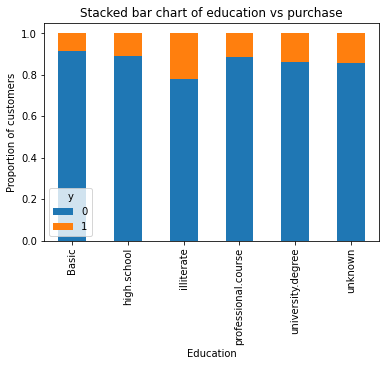

In [24]:
table = pd.crosstab(df.education, df.y)
table.div(table.sum(1), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Stacked bar chart of education vs purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of customers')

Text(0, 0.5, 'Proportion of customers')

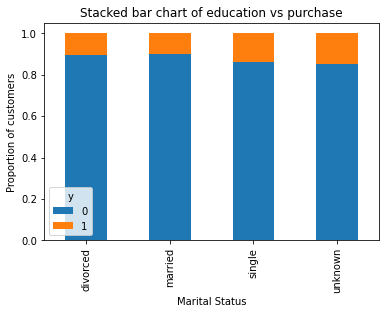

In [25]:
table = pd.crosstab(df.marital, df.y)
table.div(table.sum(1), axis = 0).plot(kind = 'bar', stacked = True)

plt.title('Stacked bar chart of education vs purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of customers')

hard to see, but marital status does not seem a strong predictor for the outcome variable

### we do one hot encoding on categorical columns

In [26]:
df.shape

(41188, 21)

In [27]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [28]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']

In [29]:
for columns in cat_columns:
    cat_list = pd.get_dummies(df[columns], prefix = columns)   #creating dummy variables
    
    data1 = df.join(cat_list) # concatenating dataframe and dummy variables
    
    df = data1

In [30]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', '

In [31]:
df.shape

(41188, 72)

In [32]:
df = df.drop(cat_columns, axis = 1)  #we drop columns whos one hot encoding has been done

In [33]:
df.shape

(41188, 62)

In [34]:
#another way to drop columns

# data_vars = df.columns.values.tolist()
# to_keep = [column for column in data_vars if column not in cat_columns]

# df_final = df[to_keep]

In [35]:
df.default_unknown.value_counts()

0    32591
1     8597
Name: default_unknown, dtype: int64

### Model building

In [36]:
x = df.drop('y', axis = 1)

y = df.y

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 1)

log_model = LogisticRegression()

log_model.fit(x_train, y_train)

C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
log_model.score(x_train, y_train)

0.9100967708369463

In [39]:
log_model.score(x_test, y_test)   #accuracy

0.9072590434571498

In [40]:
y_pred = log_model.predict(x_test)

In [41]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#support is no of observations

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10924
           1       0.68      0.38      0.49      1433

    accuracy                           0.91     12357
   macro avg       0.80      0.68      0.72     12357
weighted avg       0.89      0.91      0.90     12357



In [42]:
#one sample record
x_test[:1]

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
35577,31,95,1,999,0,1.4,93.918,-42.7,4.961,5228.1,...,0,0,0,0,0,1,0,0,1,0


In [43]:
#prediction
log_model.predict(x_test[:1])

array([0], dtype=int64)

In [44]:
#predicted probability
log_model.predict_proba(x_test[:1])

array([[0.99009458, 0.00990542]])

In [45]:
#predicted probability of the record being 1(subscribing to term deposit)
log_model.predict_proba(x_test[:1])[:, 1]

array([0.00990542])

In [46]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [47]:
log_roc_auc = roc_auc_score(y_test, log_model.predict(x_test))
log_roc_auc

0.6801705266584609

Text(0.5, 1.0, 'Receivver operating characteristic')

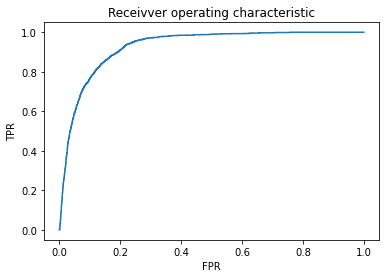

In [48]:
fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:, 1])

plt.plot(fpr, tpr)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Receivver operating characteristic')

### SMOTE: synthetic minority over-sampling technique

In [49]:
#pip install imblearn

In [89]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [90]:
x = df.drop('y', axis = 1)

y = df.y

In [91]:
os = SMOTE(random_state = 0)

In [92]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [93]:
columns = x_train.columns

In [98]:
os_data_x, os_data_y = os.fit_resample(x_train, y_train.values)   #resamples/oversamples to balanced dataset

os_data_x = pd.DataFrame(data = os_data_x, columns = columns)
od_data_y = pd.DataFrame(data = os_data_y, columns = ['y'])

In [83]:
print('length of oversampled data:', len(os_data_x))

length of oversampled data: 51134


In [100]:
print('number of subscription', len(os_data_y[os_data_y['y'] == 1]))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

### Recursive Feature Elimination: backward elimination
eliminates one weak feature at a time

In [103]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 20)  # selecting 20 best features

rfe = rfe.fit(os_data_x, os_data_y)

C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ganesh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

In [104]:
os_data_x.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day

In [105]:
print(rfe.support_)  #True means they are among best 20 feature 
print(rfe.ranking_)  #1 means they are among best 20 feature

[False False False False False False False False False False False False
 False False False False False False False False False False  True  True
  True  True  True  True False  True  True  True False False False  True
  True  True  True  True  True False False False False False False False
 False False False False False  True  True  True  True  True False False
 False]
[34 37 33 39 32 29 28 35 20 36 15  8  9 11 14 40 13 12 19 10 16 17  1  1
  1  1  1  1 41  1  1  1  3  2 42  1  1  1  1  1  1  5  4 21 23 24 25 26
 30 18 22 38 27  1  1  1  1  1  7  6 31]


In [107]:
# extracting 20 best columns

cols = []
for i in range(len(os_data_x.columns)):
    if rfe.support_[i] == True:
        cols.append(os_data_x.columns[i])

In [108]:
cols

['marital_divorced',
 'marital_married',
 'marital_single',
 'marital_unknown',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'housing_no',
 'housing_unknown',
 'housing_yes',
 'loan_no',
 'loan_unknown',
 'loan_yes',
 'day_of_week_fri',
 'day_of_week_mon',
 'day_of_week_thu',
 'day_of_week_tue',
 'day_of_week_wed']

selecting only 20 best columns as part of our training set

In [109]:
x = os_data_x[cols]
y = od_data_y['y']

In [112]:
import statsmodels.api as sm

logit_model = sm.Logit(y,x)  #initialization

result = logit_model.fit() #how to fit a model

print(result.summary())  #this will generate the summar ytable

Optimization terminated successfully.
         Current function value: 0.457815
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51115
Method:                           MLE   Df Model:                           18
Date:                Sat, 18 Dec 2021   Pseudo R-squ.:                  0.3395
Time:                        10:23:39   Log-Likelihood:                -23410.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
marital_divorced                  0.2589      0.059      4.389      0.

In [113]:
#we remove the columns that has p value less than 0.05 (ie insignificant features)